<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/CAP_417_3_HandsOn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png>


# CAP-417-3: Estatística Computacional
## Hands On 01

* Luan Orion Baraúna 

These exercices has proveide for [this](https://youtu.be/plPBGsnEnc8) class. 

#Parte 1 



## Random Numbers - Sequence and seeds

For the genaration of a randomic sequence of numbers we will use a python library called ```random```. This documentations can be founded [here](https://docs.python.org/3/library/random.html).

In [1]:
import random as rd

In [2]:
sequence = []
for i in range(0,1000):
  sequence.append(rd.random())
print(sequence[0:10])

[0.8603256891172502, 0.0631708849836845, 0.7383739577360037, 0.2858599032691028, 0.4280980746915136, 0.947376545808453, 0.1461112808386973, 0.21407735133451533, 0.9062080986346135, 0.5203795527084698]


However, the ```random``` library for generating _psudo-random_ numbers that seeks to construct a Gaussian number distribution uses some parameters to generate those numbers. We can determine some of these parameters that we call *seeds*.

The `seed` is a class how make the number generated by the `random` library reproducible.

In [3]:
rd.seed(10)
print(rd.random()) 

0.5714025946899135


Lets creat 3 variables and alocated random numbers with a setble seed.

In [4]:
rd.seed(10)
seed_1 = rd.random()
rd.seed(10)
seed_2 = rd.random()
rd.seed(10)
seed_3 = rd.random()

print(seed_1,seed_2,seed_3)

0.5714025946899135 0.5714025946899135 0.5714025946899135


Now lets just change the values of the seed

In [5]:
rd.seed(10)
seed_1 = rd.random()
rd.seed(20)
seed_2 = rd.random()
rd.seed(30)
seed_3 = rd.random()

print(seed_1,seed_2,seed_3)

0.5714025946899135 0.9056396761745207 0.5390815646058106


For now, lets generete a sequence of numbers with a seted seed

In [6]:
sequence_1 = []
rd.seed(10)
for i in range(0,1000):
  sequence_1.append(rd.random())

sequence_2 = []
rd.seed(10)
for i in range(0,1000):
  sequence_2.append(rd.random())

sequence_3 = []
rd.seed(10)
for i in range(0,1000):
  sequence_3.append(rd.random())


print(sequence_1[0:10])
print(sequence_2[0:10])
print(sequence_3[0:10])

[0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174, 0.81332125135732, 0.8235888725334455, 0.6534725339011758, 0.16022955651881965, 0.5206693596399246, 0.32777281162209315]
[0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174, 0.81332125135732, 0.8235888725334455, 0.6534725339011758, 0.16022955651881965, 0.5206693596399246, 0.32777281162209315]
[0.5714025946899135, 0.4288890546751146, 0.5780913011344704, 0.20609823213950174, 0.81332125135732, 0.8235888725334455, 0.6534725339011758, 0.16022955651881965, 0.5206693596399246, 0.32777281162209315]


In [7]:
#They are really equal?
sequence_1 == sequence_2 == sequence_3

True

## Distribution and Period

We will plot a bar graph to get an idea of the distribution of these points from 0 to 1. We will divide our bar graph into 10 intervals.

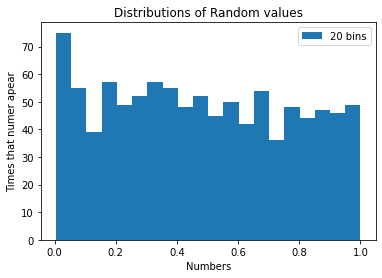

In [8]:
from matplotlib import pyplot as plt

plt.hist(sequence,bins=20,label='20 bins')
plt.title('Distributions of Random values')
plt.xlabel('Numbers')
plt.ylabel('Times that numer apear')
plt.legend()
plt.show()

## Period

Now lets bild a list of randow numbers how will grow untill the first number appears for the 2 times. 

For these we will set a seed `seed(10)` and we will use the cont.

⚠️⚠️⚠️⚠️⚠️⚠️

_The code bellow dosen't stop becouse they canot find two equal values._


In [9]:
# rd.seed(10)
# period = []
# n = 0
# while(n<2):
#   period.append(rd.random())
#   n = period.count(period[0])
# print(len(period))

Let's try for a huge size of points

_If you try to create a $10^{10}$ size vector they ocuppy the intery RAM from google colab_ 

In [10]:
import random as rd
period_1 = []
for i in range(0,100000000):
  period_1.append(rd.random())

In [11]:
period_1.count(period_1[0])

1

Printing the final results.

In [12]:
print('In the range of',format(len(period_1),'10.3e'),'points, the first value in the list appears',period_1.count(period_1[0]),'times')
if period_1.count(period_1[0]) <= 2:  print('Unfortunately we didn\'t detect any pattern 😔')
else: print('We find the period')

In the range of  1.000e+08 points, the first value in the list appears 1 times
Unfortunately we didn't detect any pattern 😔


# Parte 2
## Descriptive Statistic

1. For a 5-numbers sequence: min, 
avarage, mode, median, max, range, sum, variance, stadard deviation.

2. For a 100-numbers sequence: min, average, mode, median, max, range, sum, variance, standard deviation. 

3. Distribution (controlling bins), and percentils.

4. Average as a weighted sum.

## For a 5-numbers sequence:

For the generations of these results we will use `numpy` end `statistics` librarys. These librarys use the matematical classial equations such as:

$$m_{min} = \min(x_1, x_2,...,x_n)$$

$$\text{average} = \bar{x} = \sum_{i=1}^n \frac{x_i}{n}$$

if $n/2 \in \mathbb{Z}$ 

$$\text{median} = x_{n/2}$$

if $n/2 \in \mathbb{Q}$ 

$$\text{median} = \frac{x_{n/2+1}-x_{n/2-1}}{2} $$

$$\text{max} = \max(x_1, x_2,...x_n)$$

$$\text{sum} = \sum_{i=1}^n x_i$$

$$\text{stard} = \sigma^2 = \sqrt{ \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n}} $$

$$\text{devi} = \sigma =  \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n} $$

We could build an algorithm that generates each of these functions for a given list. However, we will use the libraries available for this language.

We will start creating a simple vector with 5 numbers

In [13]:
import numpy as np
import statistics as sta
five_sequence = [6,8,9,10,6]
min  = np.min(five_sequence)
avr  = sum(five_sequence)/len(five_sequence)
mode = sta.mode(five_sequence)
var  = sta.variance(five_sequence)
medi = sta.median(five_sequence)
max  = np.max(five_sequence)
sdt  = sta.stdev(five_sequence)

print('min =',min,'\navarage =',avr,'\nmode =',mode,'\nmedian =',medi,'\nmax =',max,'\nstd =',sdt)

min = 6 
avarage = 7.8 
mode = 6 
median = 8 
max = 10 
std = 1.7888543819998317


## For a 100-numbers sequence

Now we will try a vector of 100 interger numbers. For these example we will randomic alocated the vectors. 

In [42]:
from random import randrange
hundred_sequence = []
for i in range(0,100):
  hundred_sequence.append(randrange(100))

In [15]:
min  = np.min(hundred_sequence)
avr  = sum(hundred_sequence)/len(hundred_sequence)
#mode = sta.mode(hundred_sequence) 
var  = sta.variance(hundred_sequence)
medi = sta.median(hundred_sequence)
max  = np.max(hundred_sequence)
sdt  = sta.stdev(hundred_sequence)

print('min =',min,'\navarage =',avr,'\nmode =',mode,'\nmedian =',medi,'\nmax =',max,'\nstd =',sdt)  

min = 0 
avarage = 47.99 
mode = 6 
median = 46.0 
max = 98 
std = 29.85063659372284


_Obs.: They have problens to find a mode is theses distriburios_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


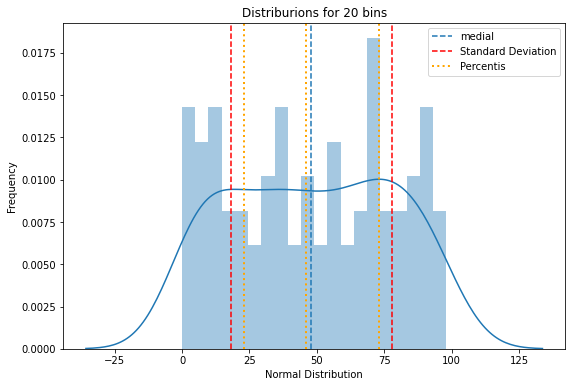

In [16]:


import seaborn as sns

#Creating a figure 
fig = plt.subplots(figsize=(9,6))

#Ploting distribuition using seaborn
ax = sns.distplot(hundred_sequence,bins=20)
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title='Distriburions for 20 bins')

#Ploting Avarege
plt.axvline(avr, label = 'medial',linestyle = '--')

#Ploting Stadart Deviation
plt.axvline(avr+sdt, label = 'Standard Deviation',linestyle = '--',color = 'red')
plt.axvline(avr-sdt,linestyle = '--',color = 'red')

#Percentils
#Sorted list
sorted_hundred_sequence = np.sort(hundred_sequence) #Sorting list 
plt.axvline(sorted_hundred_sequence[25],linestyle = ':',color = 'orange', linewidth = 2)
plt.axvline(sorted_hundred_sequence[50],linestyle = ':',color = 'orange', linewidth = 2)
plt.axvline(sorted_hundred_sequence[75],linestyle = ':',color = 'orange', linewidth = 2,label = 'Percentis')

#Not sorted list
# plt.axvline(hundred_sequence[50],linestyle = ':',color = 'black')
# plt.axvline(hundred_sequence[25],linestyle = ':',color = 'black')
# plt.axvline(hundred_sequence[75],linestyle = ':',color = 'black')

plt.legend()
plt.show()

## Avarege as wigth sum

I dont Understand that part

# Parte 3


## Visualization


Data has a Time Series, 

1. Bar grath 
2. Pie grath 
3. Box-plot

In [17]:
#First let chose who will be the bins devisions
bins = 10
#Defing the size of intervals
size = int(len(hundred_sequence)/bins)

In [18]:
#Dividing the sequence in intervals of sumed data
new_sequence = []

for i in range(1,bins+1):
  new_sequence.append(np.sum(hundred_sequence[ (size*(i-1)):size*i])/size)
height = new_sequence

#Creating a x_label with the range of data
bars = []
for i in range(bins):  bars.append(str(i*size)+'-'+str(i*size+size))

#Position of Y data
y_pos = np.arange(bins)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


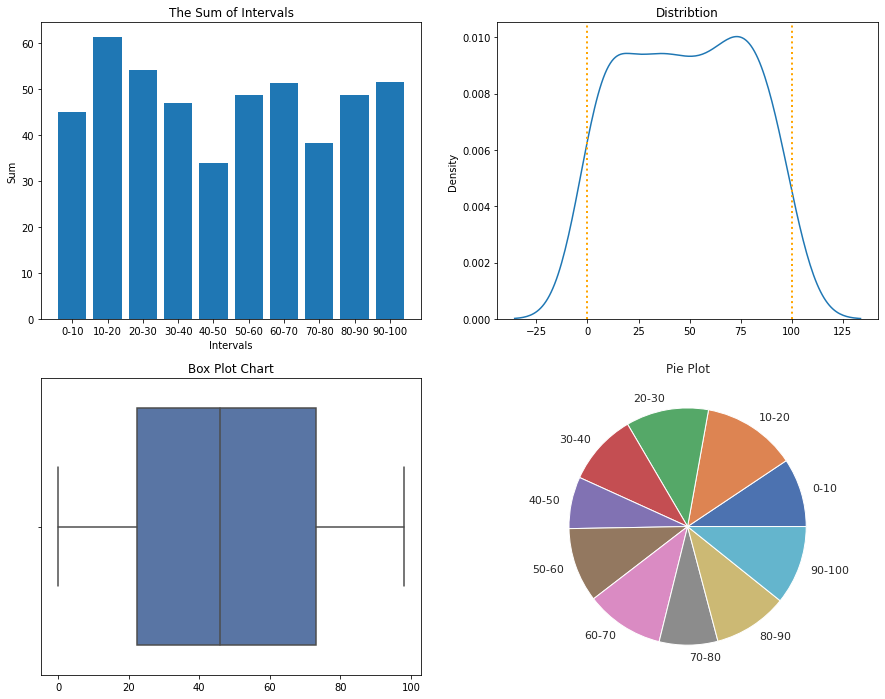

In [19]:
#Creatind a Figure Envirement
plt.figure(figsize=(15, 12))

#Bar Plot
plt.subplot(2,2,1)
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.title("The Sum of Intervals")
plt.xlabel("Intervals")
plt.ylabel("Sum")

#Distribuition Plot
plt.subplot(2,2,2)
sns.kdeplot(hundred_sequence)
plt.title('Distribtion')
plt.axvline(0,linestyle = ':',color = 'orange', linewidth = 2)
plt.axvline(100,linestyle = ':',color = 'orange', linewidth = 2)


#Box-Plot 
plt.subplot(2,2,3)
sns.set(style="dark")
sns.kdeplot
sns.boxplot(hundred_sequence)
plt.title('Box Plot Chart')

#Pie Plot
plt.subplot(2,2,4)
plt.pie(new_sequence,labels=bars)
plt.title('Pie Plot')

# Show graphic
plt.show()

# Part 4

## Analitical vs Geometrical Aprochs

* Min
* Average
* Mode
* Median
* Max
* Range 
* Sum 
* Variance
* Deviarion 

# Parte 5

## Toy Cases 

# References

* https://www.datacamp.com/community/tutorials/probability-distributions-python

* https://python-graph-gallery.com/

* https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

* https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

# Parte 6

## Moving Avarage Covid

Here we will use the sugested time-series data from covid to try to extrate the _moving avarege_. We will download the Google Covid Dada Basepride on [these](https://github.com/CSSEGISandData/COVID-19) github.

We will Pandas for Analise these data frame

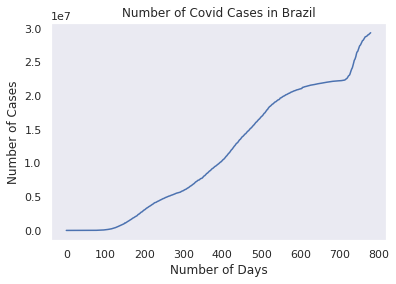

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#url with covid data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# reading the data with pandas
df = pd.read_csv(url)
#Extractinga Brazil Data from the data frame
Brazil = df[df["Country/Region"] == "Brazil"]
#Deleting some comulins
del Brazil['Province/State'], Brazil["Country/Region"], Brazil['Lat'], Brazil['Long']


datas = list(Brazil)
cases = list(Brazil.values)
cases = cases[0]

plt.plot(cases)
plt.title("Number of Covid Cases in Brazil")
plt.xlabel('Number of Days')
plt.ylabel('Number of Cases')
plt.show()


## Moving Avarege - Random Data

Well... I couldn't find the data needed to make the moving average of covid. How about we do with the data we're working on? This time I will generate a list with 1000 random points. The moving average will be generated from a number of steps called "step".


In [51]:
#Geneting the 1000 points data 
from random import randrange
thousand_sequence = []
for i in range(0,1000): thousand_sequence.append(randrange(100))

In [54]:
moving_avarage = []

step = 20

#Converting the list type for a numpy array
thousand_sequence = np.array(thousand_sequence)

for i in range(len(thousand_sequence)):
  moving_avarage.append(sum(thousand_sequence[i-step if i-step > step else 0 :i])/step)



Text(0.5, 1.0, 'Moving Avarage')

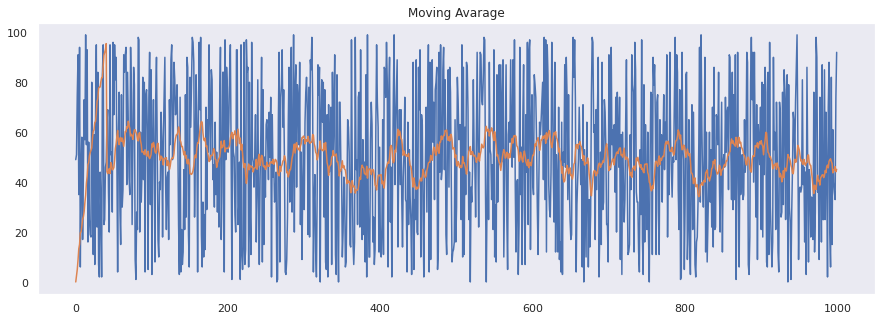

In [60]:
from IPython.core.pylabtools import figsize
fig = figsize(15,5)
plt.plot(thousand_sequence)
plt.plot(moving_avarage)
plt.title('Moving Avarage')
plt.xlabel('Number of Points')
plt.ylabel('')

[2, 5, 6, 7, 2, 5, 6, 7]